## Stocks & Covid

In this notebook, we'll see how the stock of some large corporations performed when the pandemic swept the world.
To accomplish this, we'll use the Yahoo finance data and Covid cases data made available by the New York Times.

For starts, let's install the required packages and do some setup

In [32]:
%%capture
!pip install yfinance

In [33]:
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
# Plotting libraries
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 6)
plt.style.use('seaborn-darkgrid')

warnings.filterwarnings('ignore')

Next, we download the stock market data for 4 big companies. We'll look at some companies that we expect to have performed well due to lockdown times, and some companies that we expect have suffered from the travel restrictions imposed almost worldwide.

In [34]:
%%capture
tickers = ["MSFT", "NFLX", "BKNG", "AAL"]
data = yf.download(" ".join(tickers), start="2020-01-01", end="2022-01-07")

In [35]:
display(data.head())

Adj Close                                           Close  \
                  AAL         BKNG        MSFT        NFLX        AAL   
Date                                                                    
2019-12-31  28.574404  2053.729980  154.749741  323.570007  28.680000   
2020-01-02  28.982893  2074.580078  157.615128  329.809998  29.090000   
2020-01-03  27.548195  2065.479980  155.652527  325.899994  27.650000   
2020-01-06  27.219410  2047.400024  156.054840  335.829987  27.320000   
2020-01-07  27.119778  2068.050049  154.631989  330.750000  27.219999   

                                                      High               ...  \
                   BKNG        MSFT        NFLX        AAL         BKNG  ...   
Date                                                                     ...   
2019-12-31  2053.729980  157.699997  323.570007  28.790001  2057.989990  ...   
2020-01-02  2074.580078  160.619995  329.809998  29.299999  2077.409912  ...   
2020-01-03  2065.479980  158.619995  325.899994  28.290001  2067.689941  ...   
2020-01-06  2047.400024  159.029999  335.829987  27.490000  2059.790039  ...   
2020-01-07  2068.050049  157.580002  330.750000  27.680000  2072.830078  ...   

                   Low                   Open                           \
                  MSFT        NFLX        AAL         BKNG        MSFT   
Date                                                                     
2019-12-31  156.449997  321.089996  28.200001  2046.510010  156.770004   
2020-01-02  158.330002  324.779999  28.980000  2068.399902  158.779999   
2020-01-03  158.059998  325.529999  28.270000  2042.469971  158.320007   
2020-01-06  156.509995  321.200012  27.190001  2050.000000  157.080002   
2020-01-07  157.320007  330.299988  27.559999  2047.390015  159.320007   

                          Volume                             
                  NFLX       AAL    BKNG      MSFT     NFLX  
Date                                                         
2019-12-31  322.000000   4396800  226900  18369400  3713300  
2020-01-02  326.100006   6451100  329000  22622100  4485800  
2020-01-03  326.779999  14008900  294000  21116200  3806900  
2020-01-06  323.119995   6105800  384000  20813700  5663100  
2020-01-07  336.470001   6105900  345300  21634100  4703200  

[5 rows x 24 columns]

Let's plot all closing prices over time:

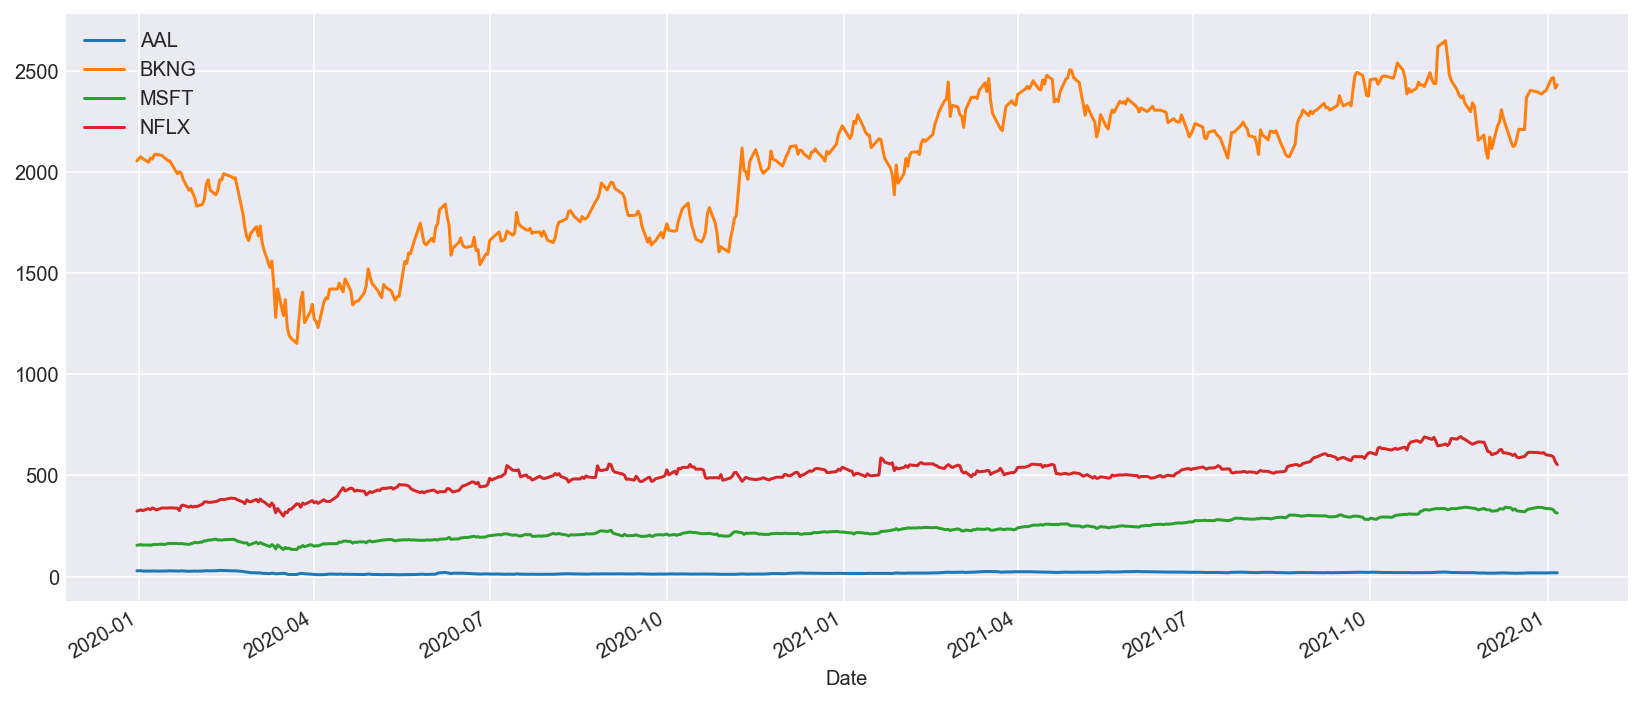

In [36]:
closes = data['Adj Close']
closes.plot()
plt.show()

This doesn't look right...

let's plot all normalized closing prices over time:

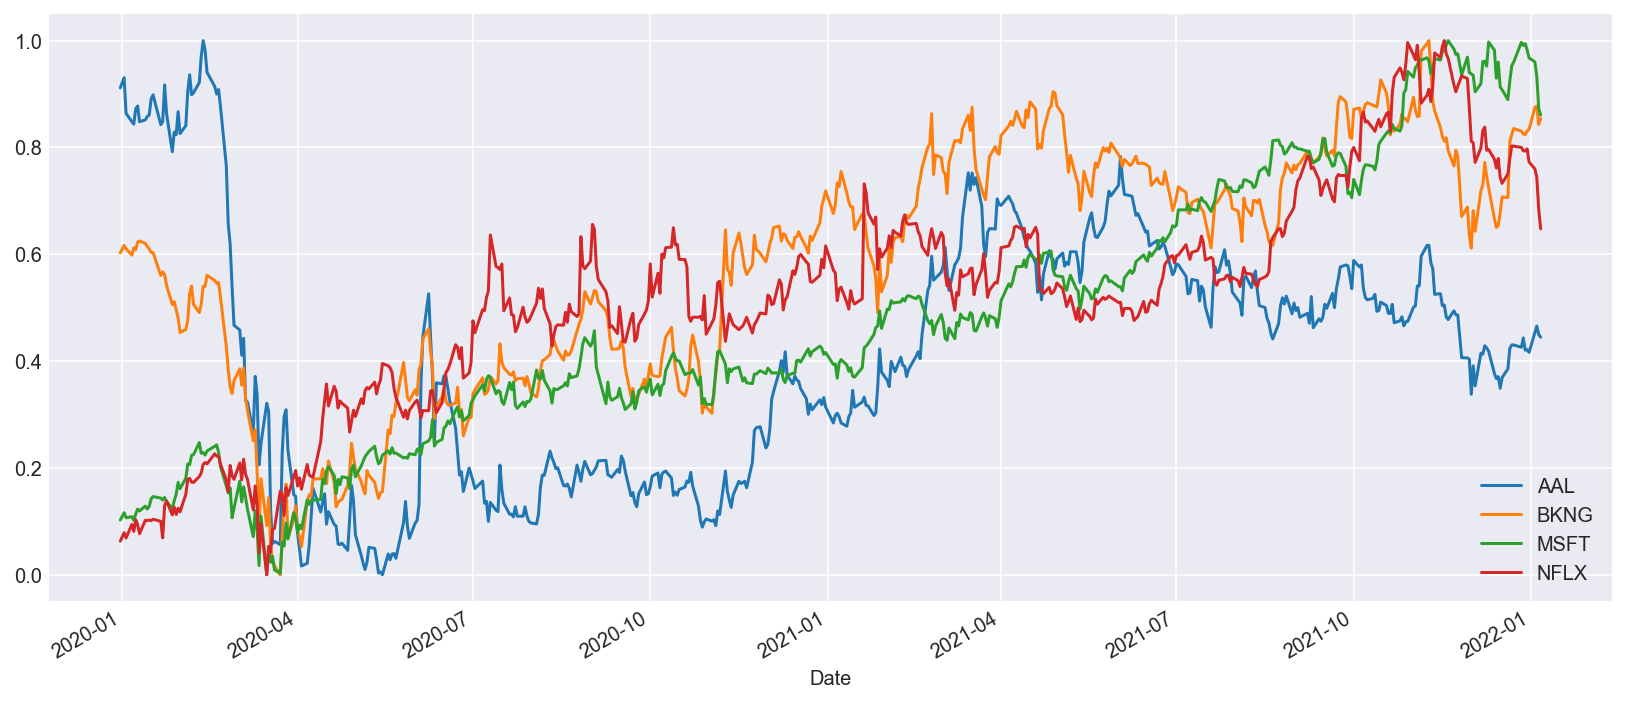

In [37]:
closes = data['Adj Close']
for tick in tickers:
    closes[tick] = ((closes[tick] - closes[tick].min()) / (closes[tick].max() - closes[tick].min()))

closes.plot()
plt.show()

In [38]:
covid = pd.read_csv('covid_cases.csv', index_col='date', usecols=['date', 'cases'])
covid.index = pd.to_datetime(covid.index)
display(covid.head())

,cases
date,
2020-01-21,1
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,3


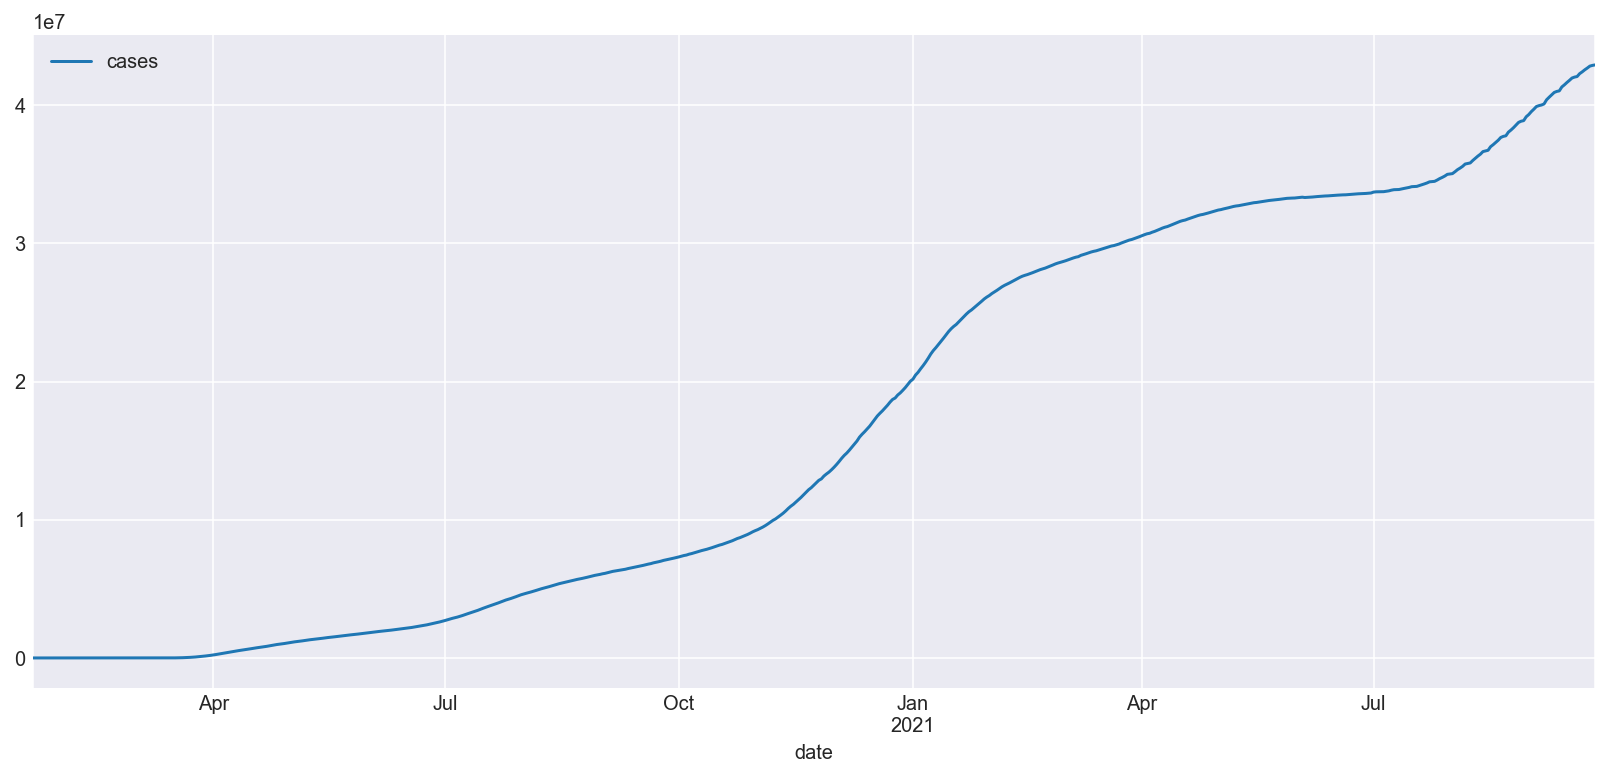

In [39]:
covid.plot();

In [40]:
# Uncumsum the cases
cumsum = (
        covid
            .cases.
    to_numpy()
)
cumsum_shifted = np.insert(np.delete(cumsum, -1), 0, 0)
uncumsum = cumsum - cumsum_shifted
covid.cases = uncumsum

covid['cases_rolling'] = covid.rolling(window=7).mean() 

In [41]:
display(covid.head(10))

,cases,cases_rolling
date,,
2020-01-21,1,NaN
2020-01-22,0,NaN
2020-01-23,0,NaN
2020-01-24,1,NaN
2020-01-25,1,NaN
2020-01-26,2,NaN
2020-01-27,0,0.714286
2020-01-28,0,0.571429
2020-01-29,0,0.571429


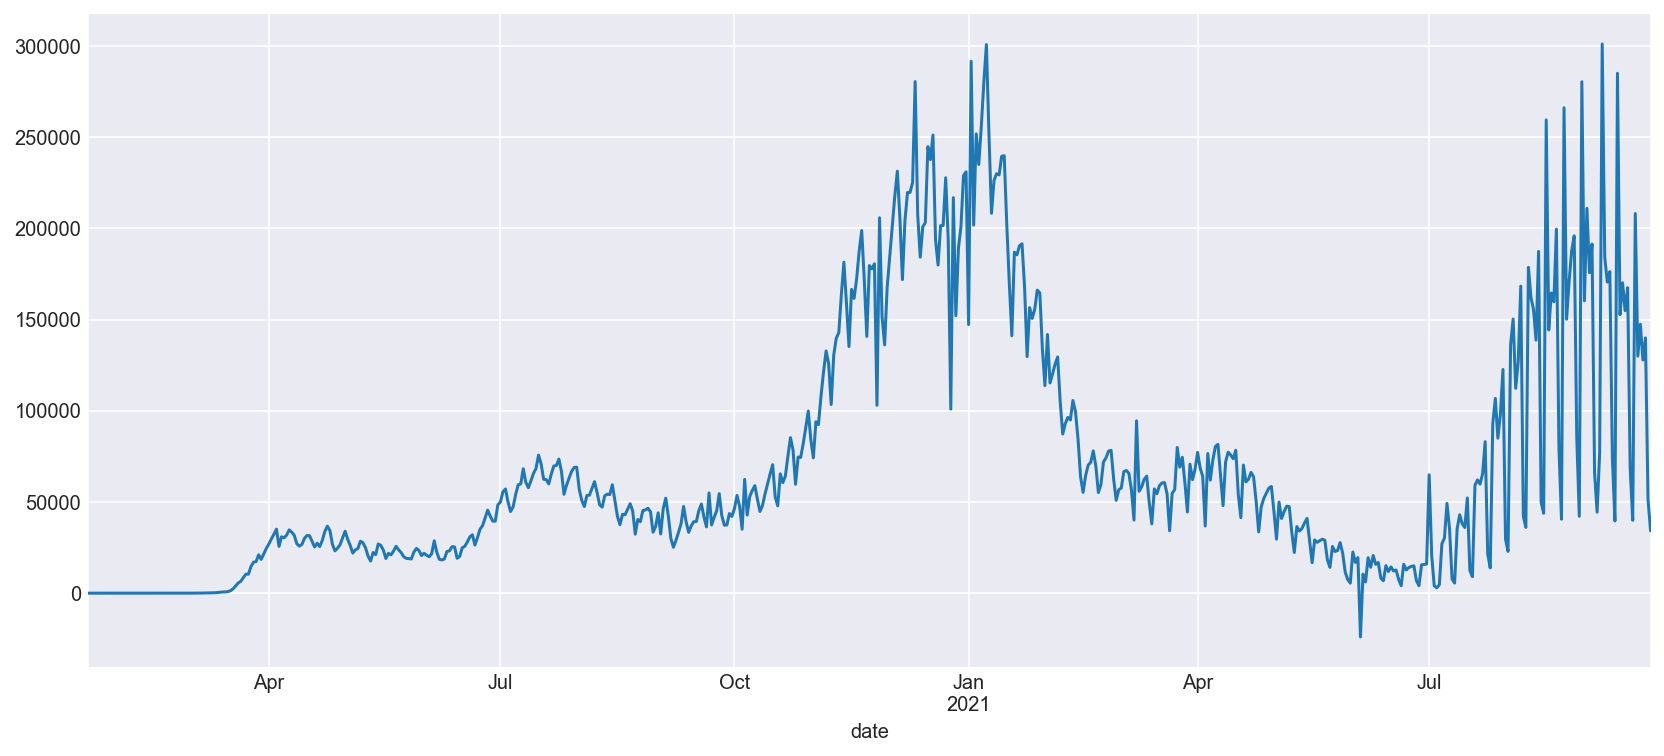

In [42]:
covid.cases.plot();

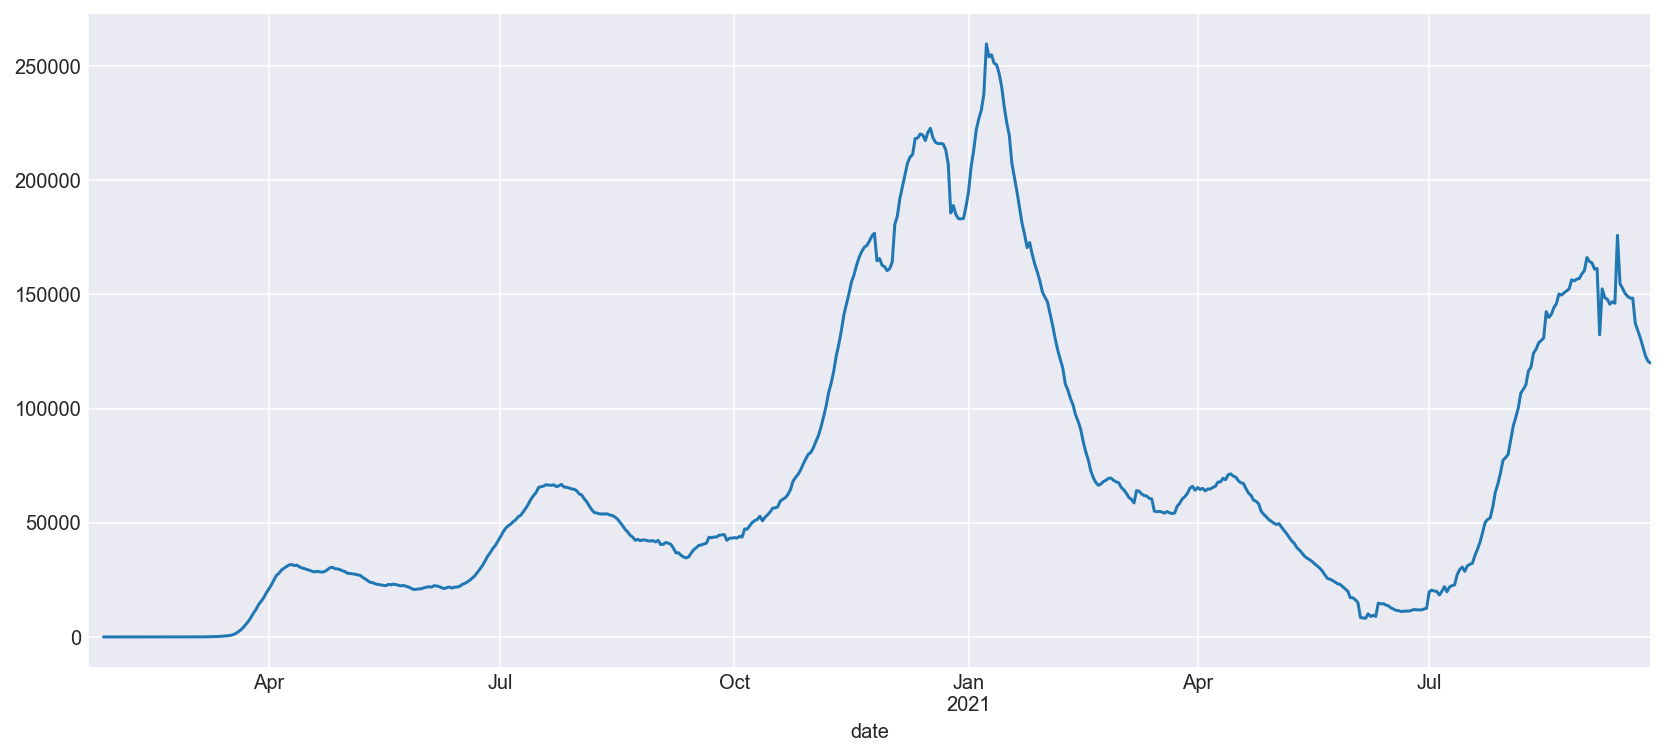

In [43]:
covid.cases_rolling.plot();

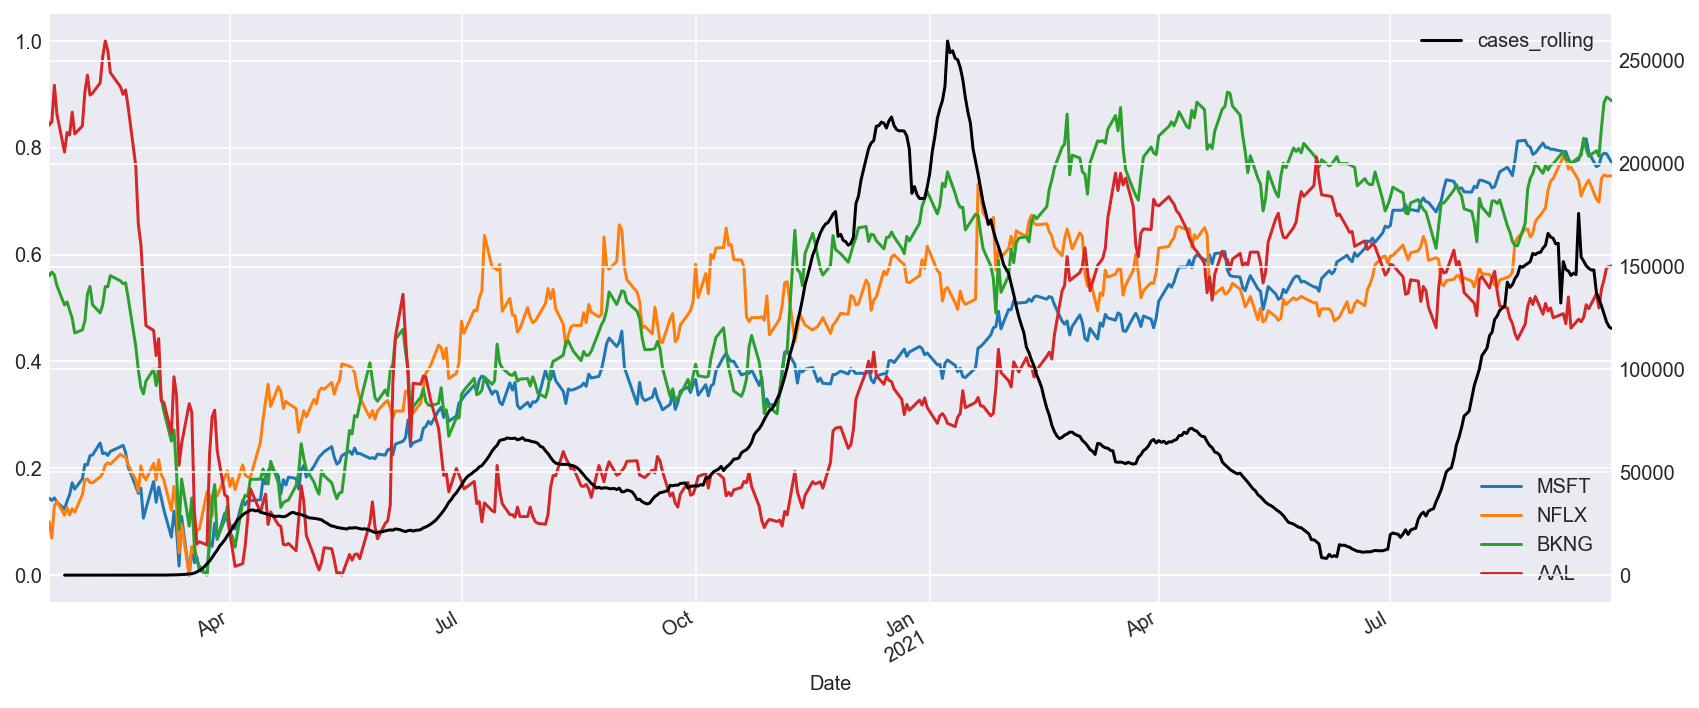

In [44]:
ax = closes.plot(y = tickers)
ax1 = ax.twinx()
covid.plot(y = 'cases_rolling', c = 'black', ax = ax1)
plt.show()

Interestingly, the sharp decline in value already happened way before the number of cases in the United States started to skyrocket. By the time the pandemic was sweeping across the country in full force, some stocks, like MSFT had already rebounded to levels seen before covid. By the time the second wave was behind us, both Microsoft, Netflix and even Booking were again at the same or higher levels than before covid. Only American Airlines is still struggling to recover and is at a lower level than it was before.